## Graph Neural Network Property Predictor


## Imports

In [1]:
# Working on segmenting from monolithic structure as this file is getting too lengthy
from model import GNN
from utils.config import MODEL_CONFIG, TRAINING_CONFIG, ANALYSIS_CONFIG, FEATURE_NAMES
from utils.visualization import VisualizationManager
import utils.data_utils as DataUtils

c:\Users\Will\miniforge3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Execution


Data Processing Debug:
Number of nodes: 100
Number of input features: 45
Feature tensor shape: torch.Size([100, 45])
Edge index shape: torch.Size([2, 238])
Target value: 0.5839136838912964

Data Processing Debug:
Number of nodes: 100
Number of input features: 45
Feature tensor shape: torch.Size([100, 45])
Edge index shape: torch.Size([2, 216])
Target value: 0.4301193058490753
Epoch   0: Train Loss = 0.7864, Validation Loss = 1.0939
Epoch   5: Train Loss = 0.5832, Validation Loss = 0.7058
Epoch  10: Train Loss = 0.4216, Validation Loss = 0.4053
Epoch  15: Train Loss = 0.2943, Validation Loss = 0.2518
Epoch  20: Train Loss = 0.2016, Validation Loss = 0.1664


c:\Users\Will\miniforge3\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  25: Train Loss = 0.1311, Validation Loss = 0.1400
Epoch  30: Train Loss = 0.0802, Validation Loss = 0.1482
Epoch  35: Train Loss = 0.0479, Validation Loss = 0.1844
Epoch  40: Train Loss = 0.0321, Validation Loss = 0.2677
Epoch  45: Train Loss = 0.0251, Validation Loss = 0.2661
Epoch  50: Train Loss = 0.0195, Validation Loss = 0.2570
Epoch  55: Train Loss = 0.0142, Validation Loss = 0.2508
Epoch  60: Train Loss = 0.0108, Validation Loss = 0.2573
Epoch  65: Train Loss = 0.0087, Validation Loss = 0.2571
Epoch  70: Train Loss = 0.0069, Validation Loss = 0.2551
Epoch  75: Train Loss = 0.0055, Validation Loss = 0.2684
Epoch  80: Train Loss = 0.0044, Validation Loss = 0.2926
Epoch  85: Train Loss = 0.0036, Validation Loss = 0.3147
Epoch  90: Train Loss = 0.0031, Validation Loss = 0.3343
Epoch  95: Train Loss = 0.0026, Validation Loss = 0.3390
Epoch 100: Train Loss = 0.0022, Validation Loss = 0.3349
Epoch 105: Train Loss = 0.0018, Validation Loss = 0.3426
Epoch 110: Train Loss = 0.0016,

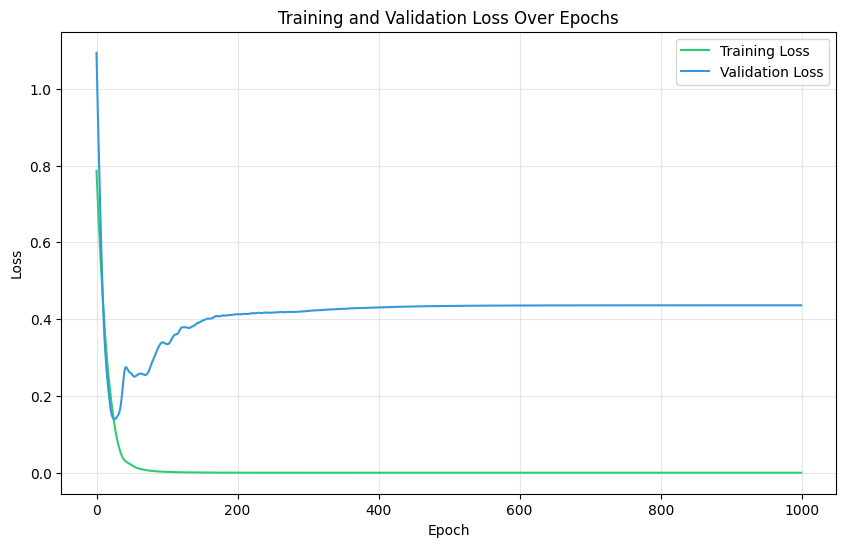


Final Validation Metrics:
val_loss: 0.4361
mae: 0.5176
r2_score: -inf


In [2]:
# Generate different graphs for training and validation to test generalization
G_train, selected_nodes_train = DataUtils.generate_graph(num_nodes=100, edge_prob=0.05)
G_val, selected_nodes_val = DataUtils.generate_graph(num_nodes=100, edge_prob=0.05)

# Select target feature for analysis  
target_feature = "Node1_Betweenness"
target_idx = FEATURE_NAMES.index(target_feature)

train_data = DataUtils.process_graph_data(G_train, selected_nodes_train, target_idx)
val_data = DataUtils.process_graph_data(G_val, selected_nodes_val, target_idx)

# Initialize model
model = GNN(node_feature_dim=len(FEATURE_NAMES)-1)

# Train model with separate validation data
losses, trained_model = model.train_model(
    model, 
    train_data=train_data,
    val_data=val_data, 
    target_idx=target_idx
)

# Plot training progress
vis = VisualizationManager()
vis.plot_training_progress(
    train_losses=[loss['train_loss'] for loss in losses],
    val_losses=[loss['val_loss'] for loss in losses],
    title="Training and Validation Loss Over Epochs"
)

# Get final validation metrics
val_metrics = trained_model.evaluate(val_data, target_idx)
print("\nFinal Validation Metrics:")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.4f}")